# Data Project - Stock Market Analysis 

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
plt.style.use('fivethirtyeight')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing stooq finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'stooq', start, end)
    #globals je funkcija koja vraća dictionary i tako povezuje stringove i dataframeove; također to pretvara u globalne varijable što znači da se mogu lako koristiti u funkcijama

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [9]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [10]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Volume,company_name
Date,,,,,,
2022-01-11,172.3200,175.1800,170.82,175.08,76138312,APPLE
2022-01-10,169.0800,172.5000,168.17,172.19,106765552,APPLE
2022-01-07,172.8900,174.1400,171.03,172.17,86709147,APPLE
2022-01-06,172.6335,175.3000,171.64,172.00,96903955,APPLE
2022-01-05,179.6100,180.1700,174.64,174.92,94537602,APPLE
...,...,...,...,...,...,...
2021-01-19,3107.0000,3145.0000,3096.00,3120.76,3305142,AMAZON
2021-01-15,3123.0200,3142.5450,3095.17,3104.25,4243995,AMAZON
2021-01-14,3167.5200,3177.9999,3120.59,3127.47,3070919,AMAZON


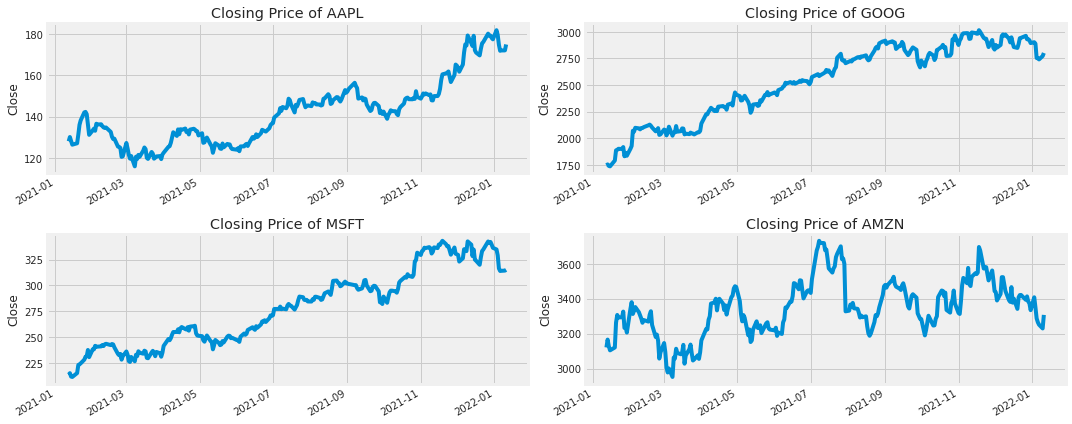

In [11]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

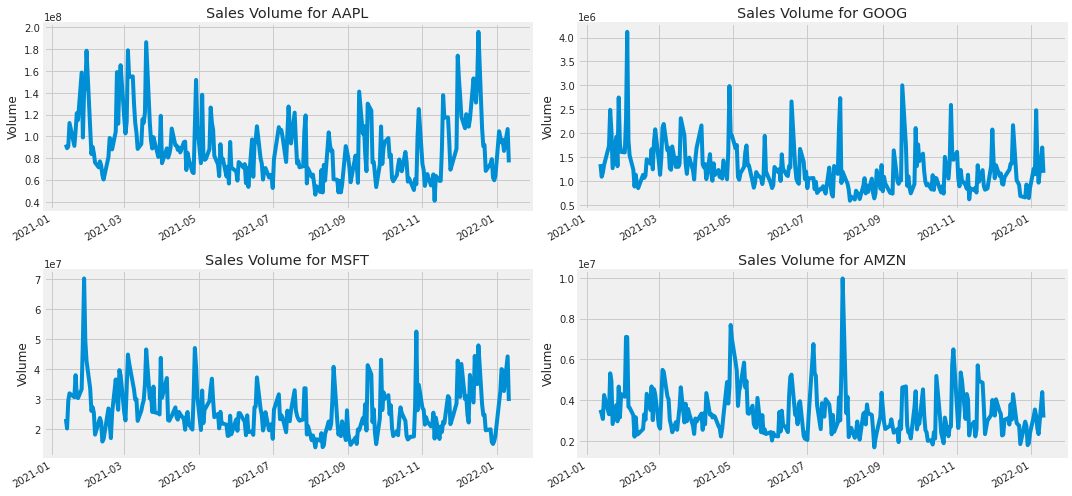

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# 2. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'stooq', start, end)['Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-01-11,175.08,2800.35,314.98,3307.24
2022-01-10,172.19,2771.48,314.27,3229.72
2022-01-07,172.17,2740.09,314.04,3251.08
2022-01-06,172.00,2751.02,313.88,3265.08
2022-01-05,174.92,2753.07,316.38,3287.14


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-01-11,NaN,NaN,NaN,NaN
2022-01-10,-0.016507,-0.010309,-0.002254,-0.023439
2022-01-07,-0.000116,-0.011326,-0.000732,0.006614
2022-01-06,-0.000987,0.003989,-0.000509,0.004306
2022-01-05,0.016977,0.000745,0.007965,0.006756


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


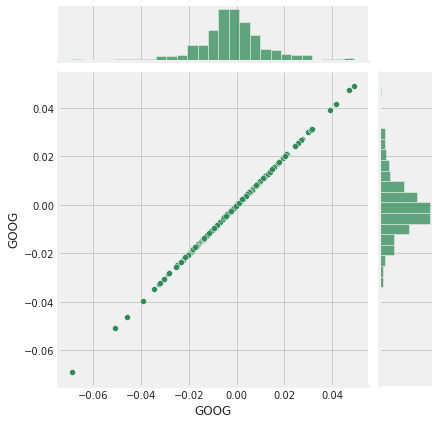

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


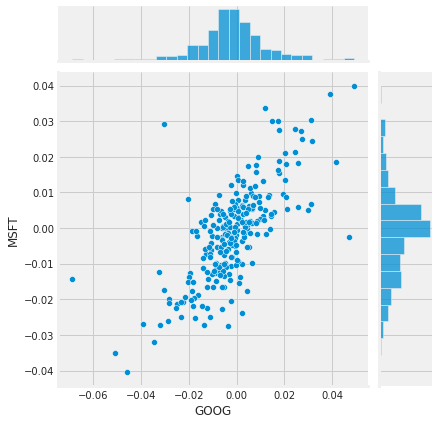

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

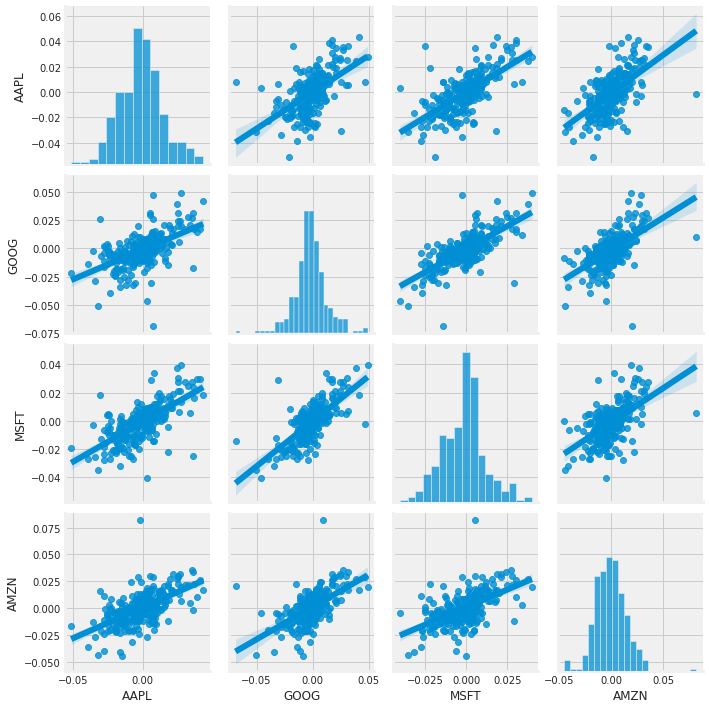

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

# 3. Predicting the closing price stock price of APPLE inc:

In [ ]:
# Get the stock quote
df = DataReader('AAPL', data_source='stooq', start='2012-01-01', end=datetime.now())
# Show teh data
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,177.830,182.880,177.710,182.010,104701220
2021-12-31,178.085,179.230,177.260,177.570,64062261
2021-12-30,179.470,180.570,178.090,178.200,59773014
2021-12-29,179.330,180.630,178.140,179.380,62348931
2021-12-28,180.160,181.330,178.530,179.290,79144339
...,...,...,...,...,...
2012-01-09,13.028,13.097,12.903,12.915,459343312
2012-01-06,12.854,12.946,12.837,12.935,371273832
2012-01-05,12.705,12.816,12.636,12.801,316062821


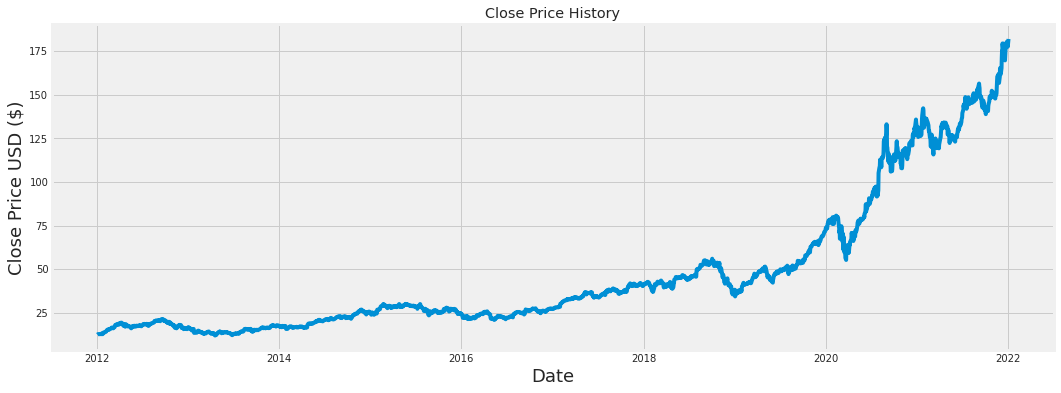

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2393

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.97386329],
       [0.97757188],
       ...,
       [0.00392639],
       [0.00309638],
       [0.00269608]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[len(scaled_data) - int(training_data_len):len(scaled_data) + 61]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(61, len(train_data) + 1):
  x_train.append(train_data[i - 60:i, 0])
  y_train.append(train_data[len(train_data) - i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
y_train = np.flip(y_train, 0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 [==============================] - 87s 36ms/step - loss: 0.0030


In [ ]:
# Create the testing data set
test_data = scaled_data[:len(scaled_data) - training_data_len]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[:len(scaled_data) - training_data_len - 60]
for i in range(61, len(test_data) + 1):
  x_test.append(test_data[i - 60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15.995761612318608

In [ ]:
test0 = []
l = []
test0.append(train_data[0:60, 0])
test0 = np.array(test0)
test0 = np.reshape(test0, (test0.shape[0], test0.shape[1], 1 ))

for i in range(60):
  predvidanja0 = model.predict(test0)
  l.append(predvidanja0[0][0])
  for j in range(len(test0[0])-1, -1, -1):
    test0[0][j] = test0[0][j-1];       
  test0[0][0] = predvidanja0[0]

In [ ]:
predvidanja = pd.Series(l, index=pd.date_range(datetime.now().date(), freq="D", periods=60))
predvidanja = predvidanja.to_frame(name = 'Close')
predvidanja = scaler.inverse_transform(predvidanja)

q = []
for i in range(60):
  q.append(predvidanja[i][0])

predvidanja1 = pd.Series(q, index=pd.date_range(datetime.now().date(), freq="D", periods=60))
predvidanja1 = predvidanja1.to_frame(name = 'Close')
predvidanja1.index.name = 'Date'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


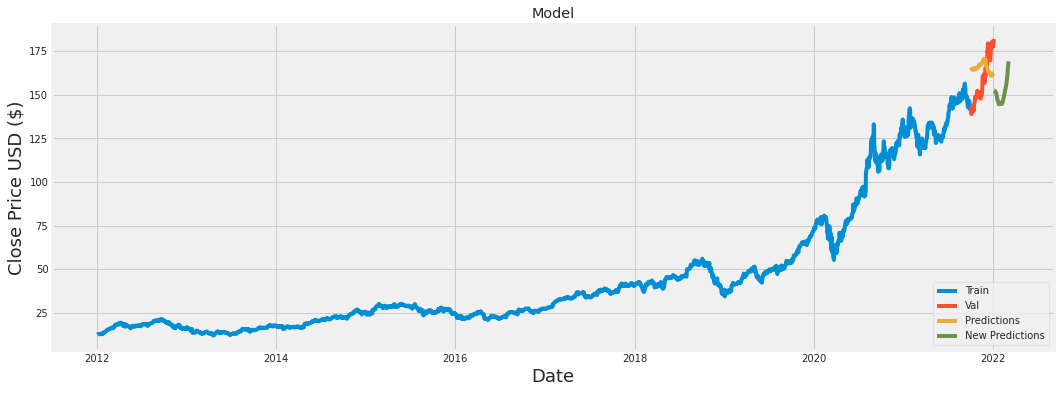

In [ ]:
# Plot the data
train = data[len(scaled_data) - training_data_len - 60:]
valid = data[:len(scaled_data) - training_data_len - 60]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(predvidanja1['Close'])
plt.legend(['Train', 'Val', 'Predictions', 'New Predictions'], loc='lower right')
plt.show()